In [ ]:
 from google.colab import drive
 import os

 drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Datasettt')


In [ ]:
# Dark
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/dark')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#light
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/light')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#mid-dark
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/mid-dark')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#mid-light
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/mid-light')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/Datasettt/skintone')

#uji dir
uji_dir = Path('/content/drive/MyDrive/Datasettt/testing')

In [ ]:
#Get filepaths and labels
filepaths_ = list(image_dir.glob(r'**/*.jpg'))
labels_ = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_))

# Get filepaths and labels uji
filepaths_uji = list(uji_dir.glob(r'**/*.jpg'))
labels_uji = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_uji))
print(labels_uji)

['dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-

In [ ]:
import pandas as pd
filepaths1 = pd.Series(filepaths_, name='Filepath').astype(str)
labels1 = pd.Series(labels_, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths1, labels1], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Datasettt/skintone/mid-...,mid-light
1,/content/drive/MyDrive/Datasettt/skintone/ligh...,light
2,/content/drive/MyDrive/Datasettt/skintone/mid-...,mid-dark
3,/content/drive/MyDrive/Datasettt/skintone/mid-...,mid-light
4,/content/drive/MyDrive/Datasettt/skintone/mid-...,mid-light


In [ ]:
# uji
filepaths2 = pd.Series(filepaths_uji, name='Filepath').astype(str)
labels2 = pd.Series(labels_uji, name='Label')
# Concatenate filepaths_uji and labels_uji
uji_df = pd.concat([filepaths2, labels2], axis=1)

# Shuffle the DataFrame and reset index
uji_df = uji_df.sample(frac=1).reset_index(drop = True)

# Show the result
uji_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Datasettt/testing/mid-l...,mid-light
1,/content/drive/MyDrive/Datasettt/testing/light...,light
2,/content/drive/MyDrive/Datasettt/testing/mid-l...,mid-light
3,/content/drive/MyDrive/Datasettt/testing/mid-d...,mid-dark
4,/content/drive/MyDrive/Datasettt/testing/light...,light


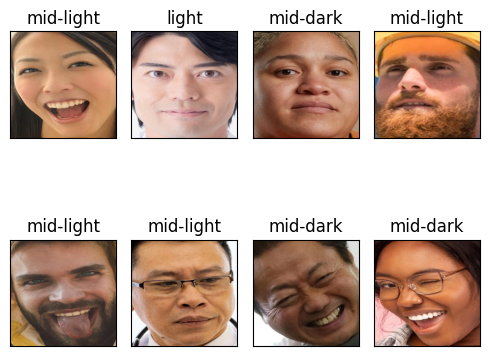

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(5, 5),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-12-d66e96ba66ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


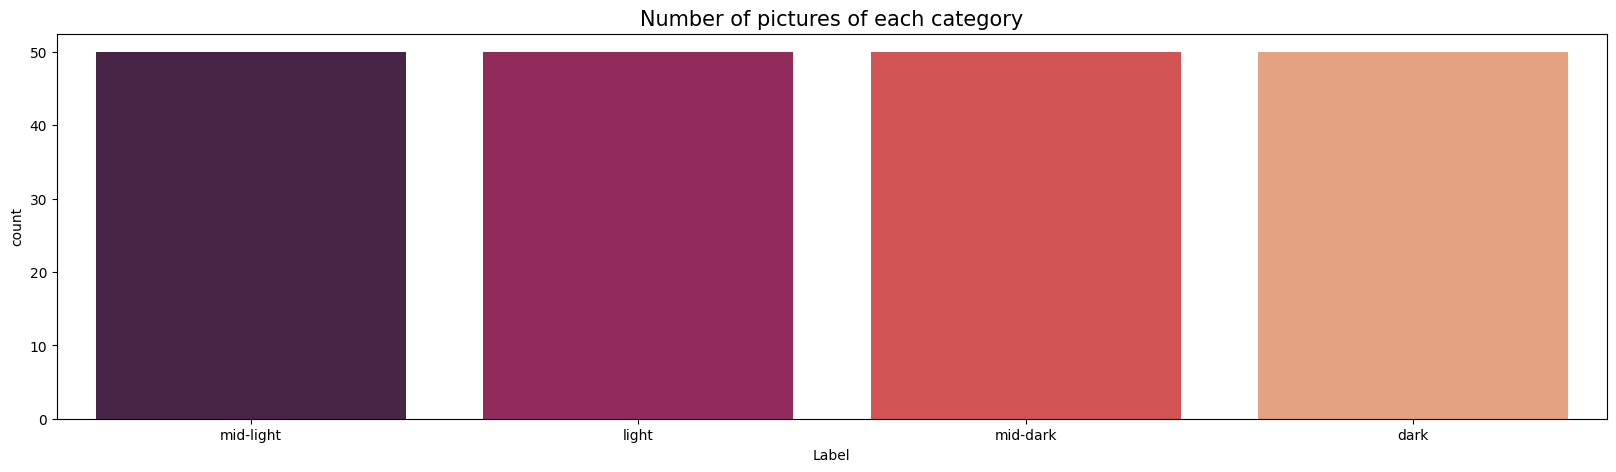

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = uji_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',)

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 3200 validated image filenames belonging to 4 classes.
Found 800 validated image filenames belonging to 4 classes.


In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-12 00:42:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  46.1MB/s    in 1.8s    

2024-06-12 00:42:54 (46.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from keras import Model, Input
input_shape = (224,224,3)
model_input = Input(shape=input_shape)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                input_tensor=model_input,
                                weights = "imagenet")

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 2048)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (4, activation='softmax')(x)

# Append the dense network to the base model
inception = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1):
      print("\Stopped")
      self.model.stop_training = True;

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Datasettt/inception_v3.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan


In [ ]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
callbacks= myCallback()
inception.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_inception = inception.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/32,
                  validation_steps=validasi_data.n/32,
                  epochs=100,
                  callbacks=([callbacks],[checkpoint_callback]))


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 1.5799 - accuracy: 0.4800 
Epoch 1: loss improved from inf to 1.57990, saving model to /content/drive/MyDrive/Datasettt/inception_v3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 1591s 16s/step - loss: 1.5799 - accuracy: 0.4800 - val_loss: 1.0784 - val_accuracy: 0.5013
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.9419 - accuracy: 0.5678
Epoch 2: loss improved from 1.57990 to 0.94192, saving model to /content/drive/MyDrive/Datasettt/inception_v3.h5
100/100 [==============================] - 89s 887ms/step - loss: 0.9419 - accuracy: 0.5678 - val_loss: 0.8983 - val_accuracy: 0.5575
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.8762 - accuracy: 0.5966
Epoch 3: loss improved from 0.94192 to 0.87617, saving model to /content/drive/MyDrive/Datasettt/inception_v3.h5
100/100 [==============================] - 81s 809ms/step - loss: 0.8762 - accuracy: 0.5966 - val_loss: 0.8299 - val_accuracy: 0.6187
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.8092 - accuracy: 0.6338
Epoch 4: loss improved from 0.87617 to 0.80923, saving model to /content/drive/My

In [ ]:
model = load_model(checkpoint_path)

callbacks= myCallback()
inception.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/32,
                  validation_steps=validasi_data.n/32,
                  epochs=10,
                  callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.3927 - accuracy: 0.8381
Epoch 1: loss did not improve from 0.38553
100/100 [==============================] - 68s 683ms/step - loss: 0.3927 - accuracy: 0.8381 - val_loss: 0.6599 - val_accuracy: 0.7375
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.3925 - accuracy: 0.8388
Epoch 2: loss did not improve from 0.38553
100/100 [==============================] - 70s 705ms/step - loss: 0.3925 - accuracy: 0.8388 - val_loss: 0.7117 - val_accuracy: 0.7337
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.4023 - accuracy: 0.8334
Epoch 3: loss did not improve from 0.38553
100/100 [==============================] - 67s 672ms/step - loss: 0.4023 - accuracy: 0.8334 - val_loss: 0.7473 - val_accuracy: 0.7425
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8472
Epoch 4: loss did not improve from 0.38553
100/100 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 74s 738ms/step - loss: 0.3826 - accuracy: 0.8353 - val_loss: 0.7192 - val_accuracy: 0.7487
Epoch 10/10
100/100 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.8381
Epoch 10: loss did not improve from 0.38261
100/100 [==============================] - 70s 701ms/step - loss: 0.3850 - accuracy: 0.8381 - val_loss: 0.7292 - val_accuracy: 0.7375


In [ ]:
model = load_model(checkpoint_path)

callbacks= myCallback()
inception.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/32,
                  validation_steps=validasi_data.n/32,
                  epochs=30,
                  callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.8372
Epoch 1: loss did not improve from 0.38261
100/100 [==============================] - 70s 703ms/step - loss: 0.3896 - accuracy: 0.8372 - val_loss: 0.7454 - val_accuracy: 0.7287
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.8363
Epoch 2: loss did not improve from 0.38261
100/100 [==============================] - 67s 670ms/step - loss: 0.3988 - accuracy: 0.8363 - val_loss: 0.7430 - val_accuracy: 0.7337
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.4068 - accuracy: 0.8422
Epoch 3: loss did not improve from 0.38261
100/100 [==============================] - 67s 669ms/step - loss: 0.4068 - accuracy: 0.8422 - val_loss: 0.7104 - val_accuracy: 0.7563
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.8400
Epoch 4: loss did not improve from 0.38261
100/100 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 71s 709ms/step - loss: 0.3779 - accuracy: 0.8369 - val_loss: 0.7271 - val_accuracy: 0.7325
Epoch 7/30
100/100 [==============================] - ETA: 0s - loss: 0.3872 - accuracy: 0.8419
Epoch 7: loss did not improve from 0.37786
100/100 [==============================] - 71s 711ms/step - loss: 0.3872 - accuracy: 0.8419 - val_loss: 0.7015 - val_accuracy: 0.7550
Epoch 8/30
100/100 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8447
Epoch 8: loss did not improve from 0.37786
100/100 [==============================] - 68s 677ms/step - loss: 0.3857 - accuracy: 0.8447 - val_loss: 0.6990 - val_accuracy: 0.7425
Epoch 9/30
100/100 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8475
Epoch 9: loss improved from 0.37786 to 0.37119, saving model to /content/drive/MyDrive/Datasettt/inception_v3.h5
100/100 [==============================] - 80s 795ms/step - loss: 0.3712 - accuracy: 0.8475 - val_loss: 0.7409 

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/Datasettt/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "InceptionV3.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
inception.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/Datasettt/H5/InceptionV3.h5...


In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

<ipython-input-36-d14c9c73262d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


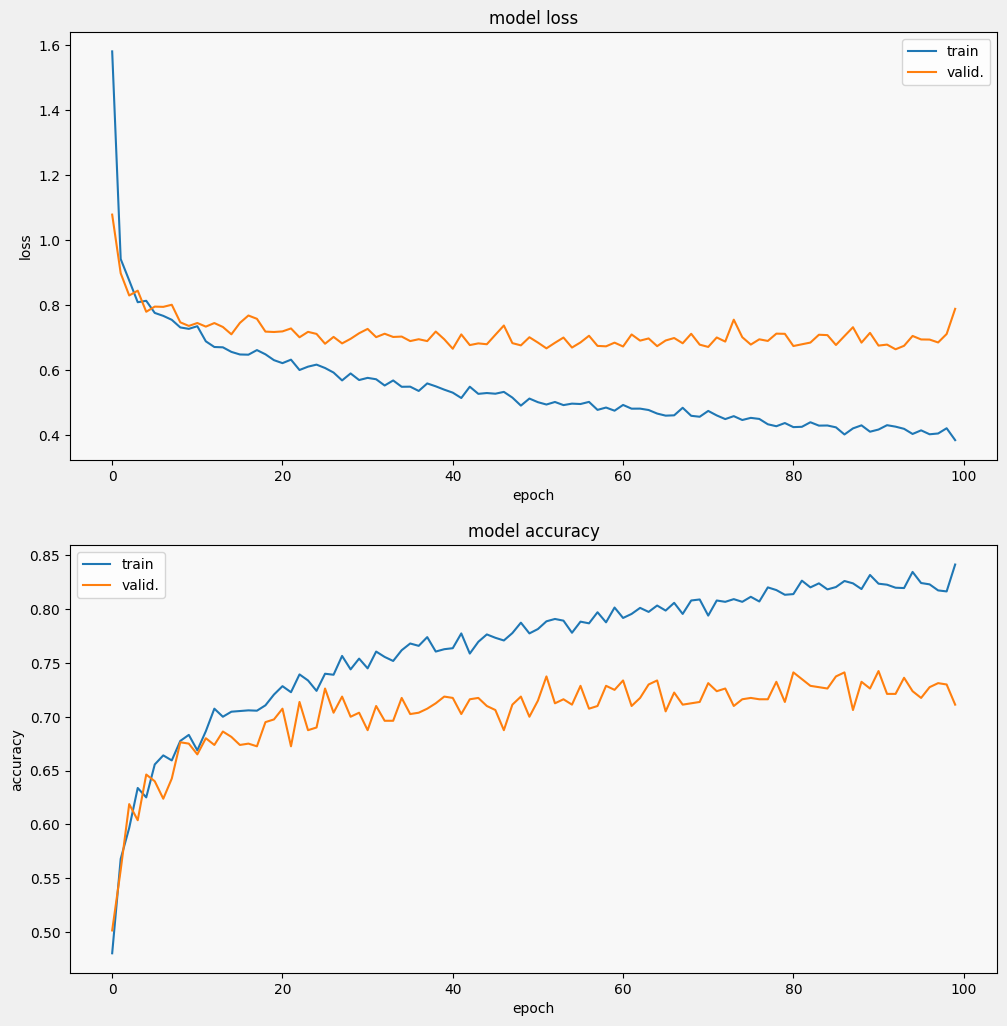

In [ ]:
#display
display_training_curves(
    history_inception.history['loss'],
    history_inception.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_inception.history['accuracy'],
    history_inception.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = inception.predict(validasi_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:4]}')

25/25 [==============================] - 6s 247ms/step
The first 5 predictions: ['mid-light', 'dark', 'mid-dark', 'light']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(validasi_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        dark       0.86      0.94      0.90       187
       light       0.74      0.71      0.72       205
    mid-dark       0.70      0.78      0.74       197
   mid-light       0.64      0.55      0.59       211

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.73      0.74      0.73       800



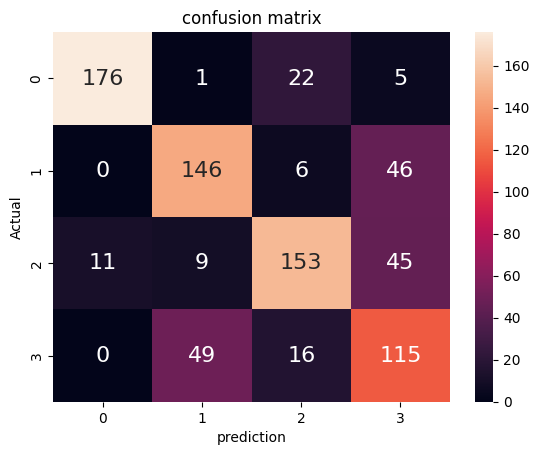

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

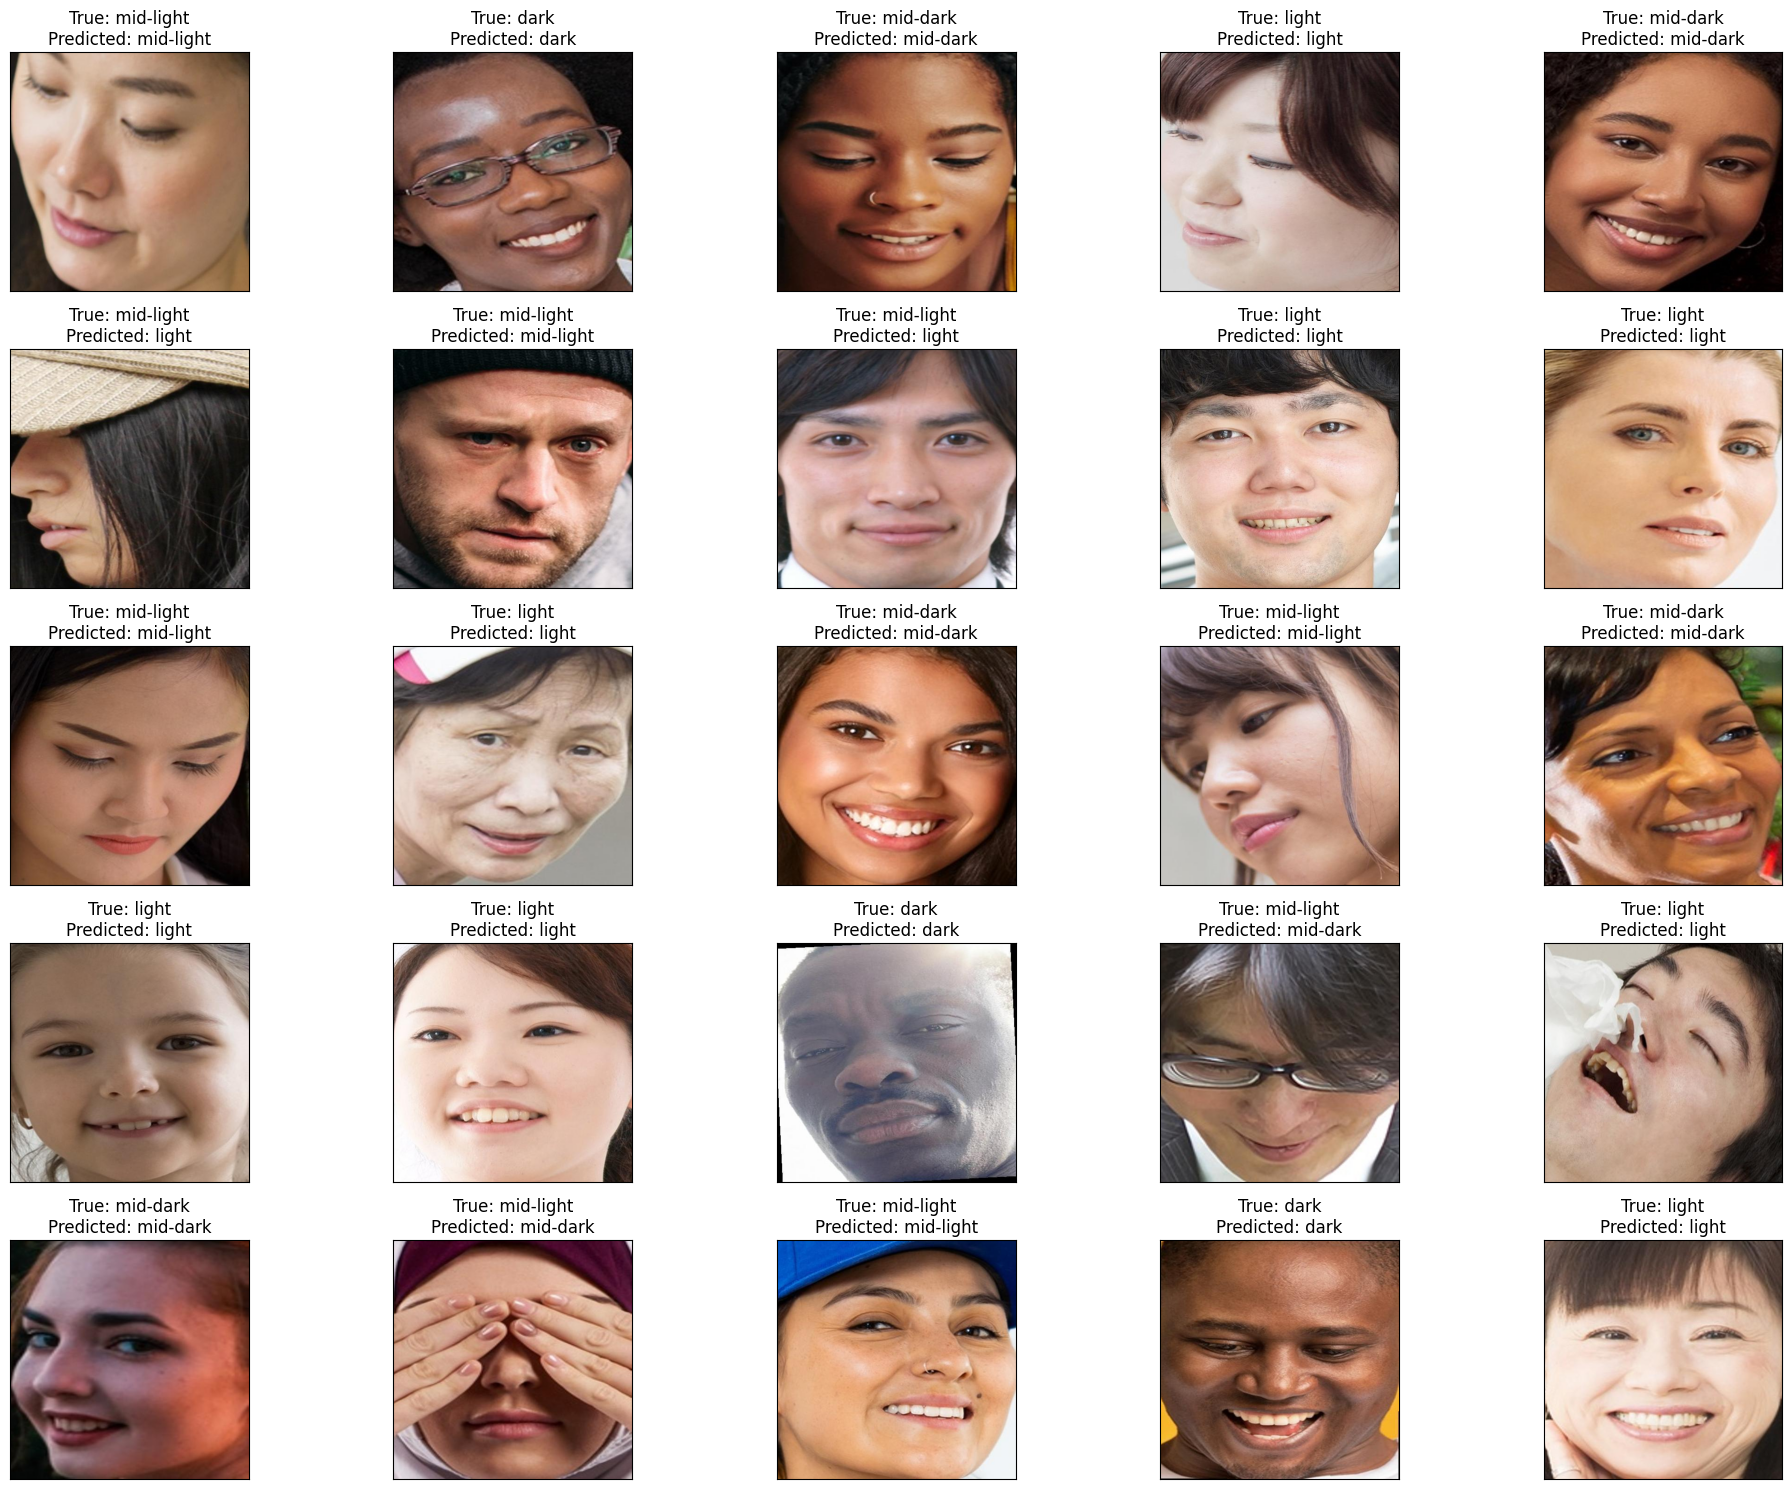

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validasi_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# Simpan history pelatihan
import pickle
history_path = '/content/drive/MyDrive/Datasettt/history_inception.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history_inception.history, f)

print("Model dan history pelatihan telah disimpan.")

Model dan history pelatihan telah disimpan.
